In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-neighborhoods-inforamtion/Toronto_neighborhood_demographics_geographics_venues.csv


In [2]:
import numpy as np
import pandas as pd
import folium # map rendering library
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests
import seaborn as sn
import matplotlib.pyplot as plt


ImportError: cannot import name 'json_normalize' from 'pandas.io.json' (/opt/conda/lib/python3.10/site-packages/pandas/io/json/__init__.py)

## Loading and Exploring a Demographics Dataset

The `neighbourhood-profiles-2016-csv.csv` contains demographic information for each neighborhood. The important data points for our analysis are the total population, the population aged 15-45, the number of educated people, and the number of employers in each neighborhood.

In [4]:
# Load the demographics dataset
demographics_data = pd.read_csv('/kaggle/input/toronto-neighborhoods-inforamtion/Toronto_neighborhood_demographics_geographics_venues.csv', sep=',', encoding='latin-1')

# Print the shape of the demographics dataset
print("The shape of the demographics dataset:", demographics_data.shape)

# Display the first few rows of the dataset
demographics_data.head()

The shape of the demographics dataset: (140, 8)


,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Agincourt North,30280.0,19805.0,11850.0,13230.0,"[-79.2816161258827, 43.797405754163]",0.0,26.0
1,Agincourt South-Malvern West,21990.0,14535.0,8840.0,9860.0,"[-79.2891688527481, 43.7851873380096]",0.0,34.0
2,Alderwood,11900.0,7915.0,4520.0,6240.0,"[-79.5532040267975, 43.5954996876866]",1.0,17.0
3,Annex,29180.0,23495.0,15095.0,16770.0,"[-79.4121466573202, 43.6744312990078]",3.0,63.0
4,Banbury-Don Mills,26910.0,20555.0,9615.0,13030.0,"[-79.326504539789, 43.7325704244428]",2.0,14.0


In [7]:
demographics_data.columns

Index(['Neighborhood', 'Total population', 'number of educated people',
       'number of 15-45', 'number of employers', 'long_latt', 'number_gyms',
       'number_venues'],
      dtype='object')

In [5]:
demographics_data.head(10)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Agincourt North,30280.0,19805.0,11850.0,13230.0,"[-79.2816161258827, 43.797405754163]",0.0,26.0
1,Agincourt South-Malvern West,21990.0,14535.0,8840.0,9860.0,"[-79.2891688527481, 43.7851873380096]",0.0,34.0
2,Alderwood,11900.0,7915.0,4520.0,6240.0,"[-79.5532040267975, 43.5954996876866]",1.0,17.0
3,Annex,29180.0,23495.0,15095.0,16770.0,"[-79.4121466573202, 43.6744312990078]",3.0,63.0
4,Banbury-Don Mills,26910.0,20555.0,9615.0,13030.0,"[-79.326504539789, 43.7325704244428]",2.0,14.0
5,Bathurst Manor,15435.0,10385.0,6115.0,7425.0,"[-79.430502667246, 43.7575784301813]",1.0,26.0
6,Bay Street Corridor,19345.0,16495.0,12800.0,10220.0,"[-79.3912583210563, 43.6606532521722]",1.0,96.0
7,Bayview Village,17675.0,13960.0,7900.0,8750.0,"[-79.3834514087178, 43.7640817777541]",3.0,37.0
8,Bayview Woods-Steeles,13535.0,10105.0,4675.0,5935.0,"[-79.3714520973767, 43.8045095069159]",0.0,18.0
9,Bedford Park-Nortown,23185.0,16330.0,8295.0,10945.0,"[-79.4274225674093, 43.7096042496363]",0.0,14.0


 select important features and drop the rest


In [8]:
pip install pandas folium geopy


Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium  # Map rendering library
from geopy.geocoders import Nominatim  # Geocoder library

# Define the address and initialize the geolocator
address = 'Toronto City, ON'
geolocator = Nominatim(user_agent="toronto_explorer")

# Get the location information for the specified address
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Print the geographical coordinates
print(f'The geographical coordinates of Toronto City are {latitude}, {longitude}.')

# Create a map centered around the specified coordinates
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map
map_toronto


The geographical coordinates of Toronto City are 43.6534817, -79.3839347.


### Folium and geocoder Explanation

1. **Install Required Libraries**:
   Before running the script, you need to install the required libraries using `pip`. You can do this in your command line or terminal:
   ```bash
   pip install pandas folium geopy
   ```

2. **Import the Libraries**:
   ```python
   import folium  # Map rendering library
   from geopy.geocoders import Nominatim  # Geocoder library
   ```
   - **Folium** is used to create interactive maps.
   - **Geopy** is used to convert addresses into geographical coordinates (latitude and longitude).

3. **Define the Address and Initialize the Geolocator**:
   ```python
   address = 'Toronto City, ON'
   geolocator = Nominatim(user_agent="toronto_explorer")
   ```
   - Here, you specify the address you want to visualize on the map. In this case, it's "Toronto City, ON".
   - **Nominatim** is a geocoding service provided by OpenStreetMap. The `user_agent` is a string that identifies your application. You can use any string, but it should be unique to your application.

4. **Get the Location Information**:
   ```python
   location = geolocator.geocode(address)
   latitude = location.latitude
   longitude = location.longitude
   ```
   - The `geocode` method converts the address into geographical coordinates (latitude and longitude).
   - `location.latitude` and `location.longitude` extract the latitude and longitude from the location object.

5. **Print the Geographical Coordinates**:
   ```python
   print(f'The geographical coordinates of Toronto City are {latitude}, {longitude}.')
   ```
   - This prints out the latitude and longitude of Toronto City.

6. **Create and Display the Map**:
   ```python
   map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)
   map_toronto
   ```
   - **folium.Map** creates a map centered at the specified latitude and longitude with a starting zoom level of 12.
   - `map_toronto` is the map object that can be displayed in a Jupyter notebook or saved to an HTML file.



In [ ]:
import ast  # For safely evaluating strings as Python expressions

# Convert the 'long_latt' column from string representations to actual lists
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return None

demographics_data['long_latt'] = demographics_data['long_latt'].apply(safe_eval)


In [25]:
# create map of Toronto using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat_lng, neighborhood in zip(demographics_data['long_latt'], demographics_data['Neighborhood']):
    lng=lat_lng[0]
    lat=lat_lng[1]
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [28]:
# Convert columns to integers
demographics_data = demographics_data.astype({
    'Total population': 'Int64',
    'number of educated people': 'Int64',
    'number of 15-45': 'Int64',
    'number of employers': 'Int64'
})

In [29]:
demographics_data.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues
count,140.0,140.0,140.0,140.0,140.000000,140.000000
mean,18676.928571,12801.25,8102.035714,9049.357143,0.914286,40.328571
std,9099.209342,6606.830919,4541.999603,4631.833115,1.322118,29.377582
min,6490.0,3585.0,2805.0,2790.0,0.000000,4.000000
25%,11851.25,8052.5,5060.0,5916.25,0.000000,18.000000
50%,16367.5,11290.0,6822.5,7595.0,0.000000,27.500000
75%,22410.0,16352.5,9885.0,10930.0,1.000000,59.250000
max,53350.0,39080.0,29695.0,31375.0,7.000000,100.000000


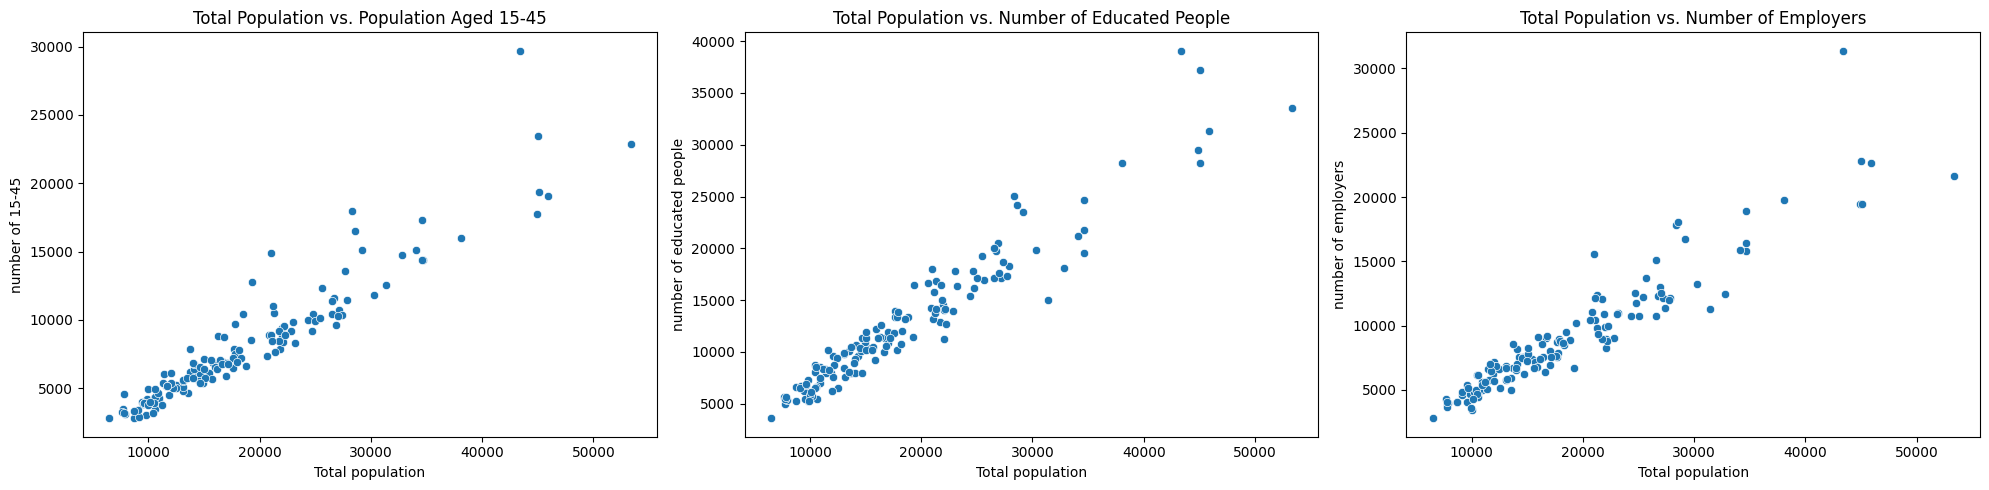

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=False)

# Scatter plot for Total Population vs Population Aged 15-45
sns.scatterplot(ax=axs[0], data=demographics_data, x='Total population', y='number of 15-45')
axs[0].set_title('Total Population vs. Population Aged 15-45')

# Scatter plot for Total Population vs Number of Educated People
sns.scatterplot(ax=axs[1], data=demographics_data, x='Total population', y='number of educated people')
axs[1].set_title('Total Population vs. Number of Educated People')

# Scatter plot for Total Population vs Number of Employers
sns.scatterplot(ax=axs[2], data=demographics_data, x='Total population', y='number of employers')
axs[2].set_title('Total Population vs. Number of Employers')

# Display the plots
plt.tight_layout()
plt.show()


Distrubition of each of the features.

In [35]:
def plot_histograms(data_used):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    sns.histplot(ax=axs[0,0],data=data_used,x='Total population')
    axs[0,0].set_title('Total population')
    sns.histplot(ax=axs[0,1],data=data_used,x='number of 15-45')
    axs[0,1].set_title('number of 15-45')
    sns.histplot(ax=axs[0,2],data=data_used,x='number of educated people')
    axs[0,2].set_title('number of educated people ')

    sns.histplot(ax=axs[1,0],data=data_used,x='number of employers')
    axs[1,0].set_title('number of employers')

    sns.histplot(ax=axs[1,1],data=data_used,x='number_gyms')
    axs[1,1].set_title('number_gyms')
    sns.histplot(ax=axs[1,2],data=data_used,x='number_venues')
    axs[1,2].set_title('number_venues ')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

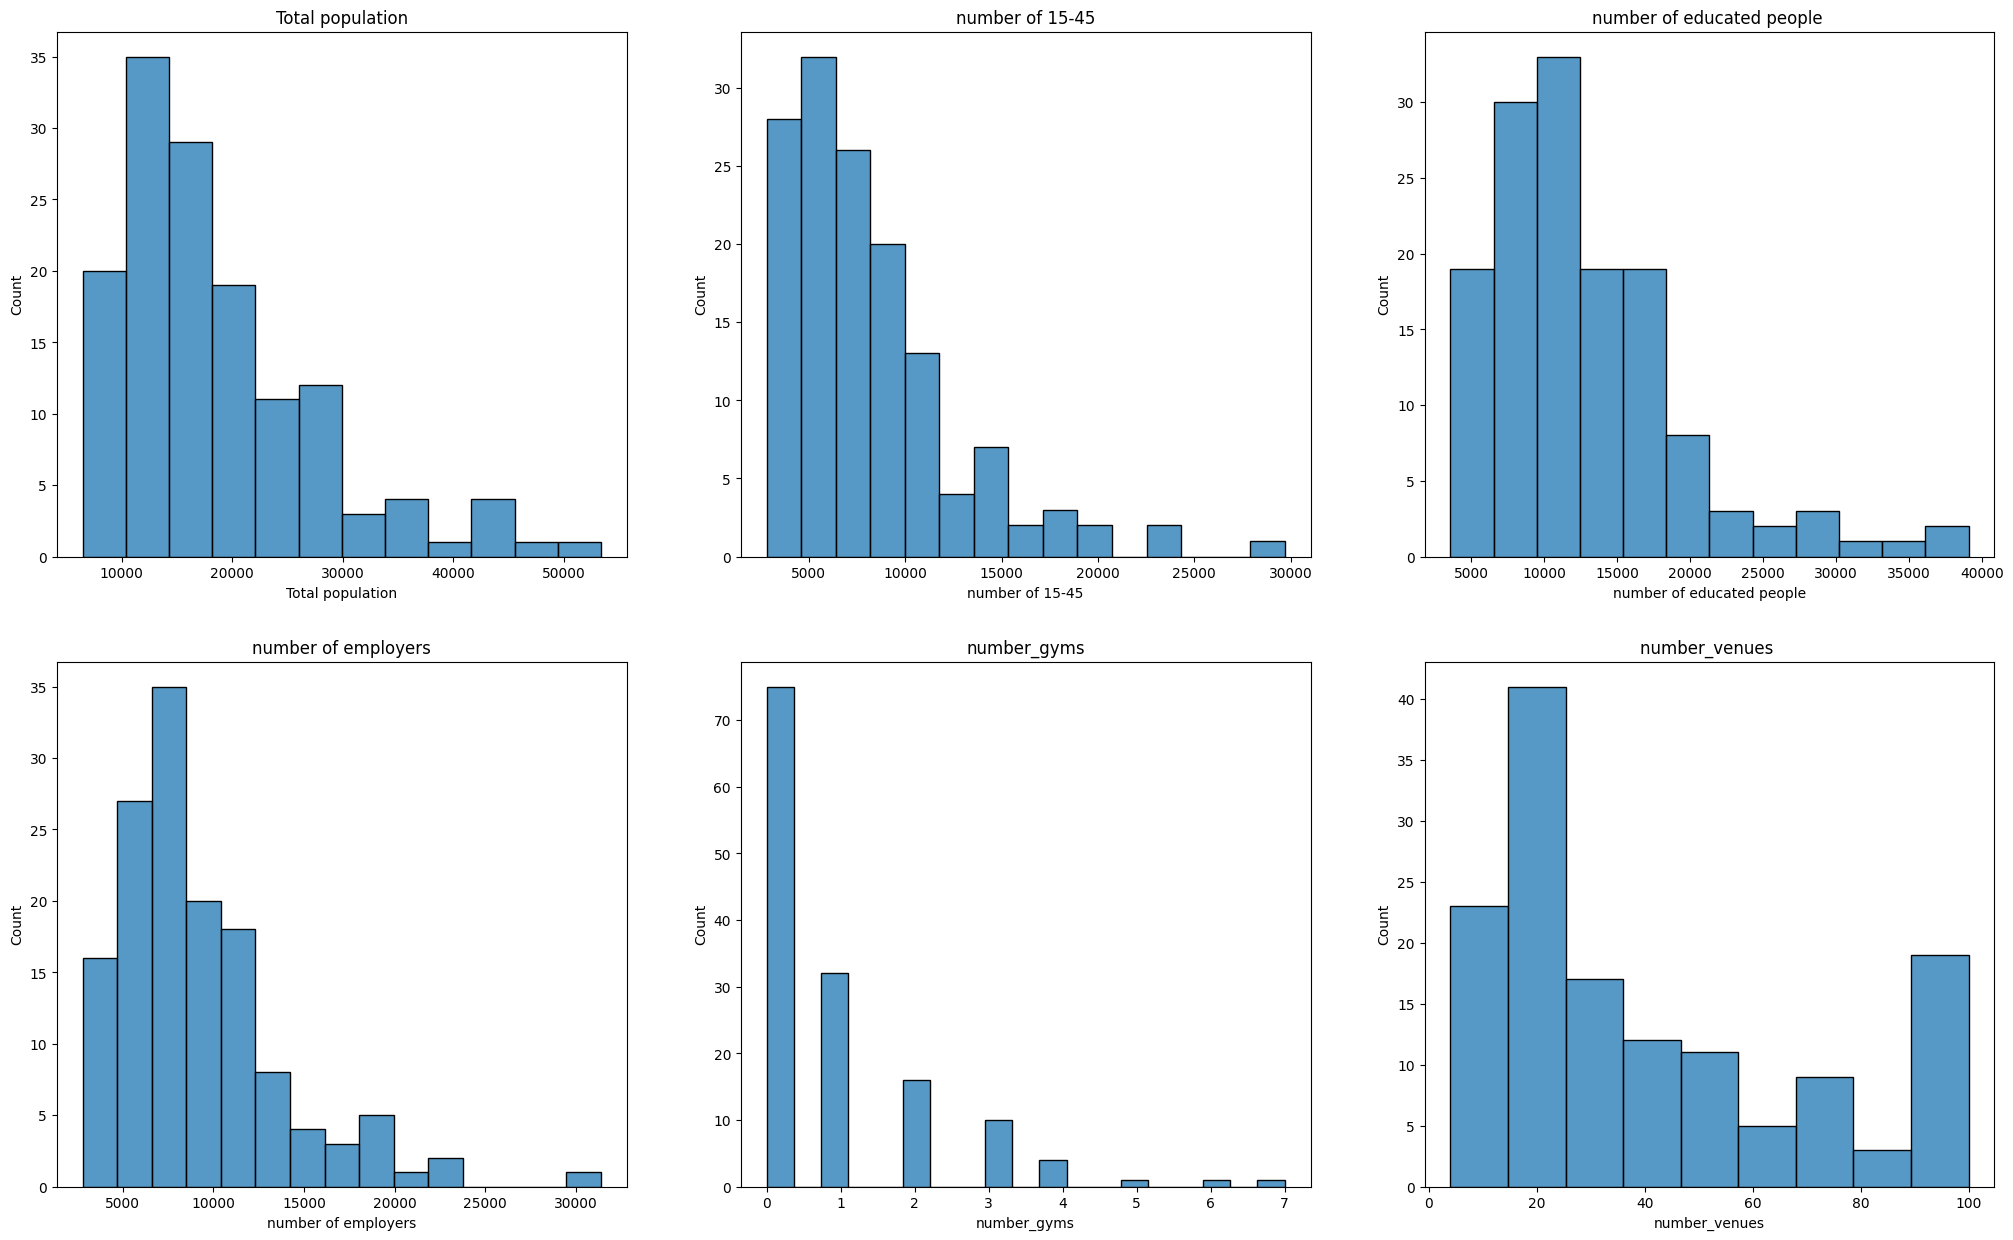

In [36]:
plot_histograms(demographics_data)

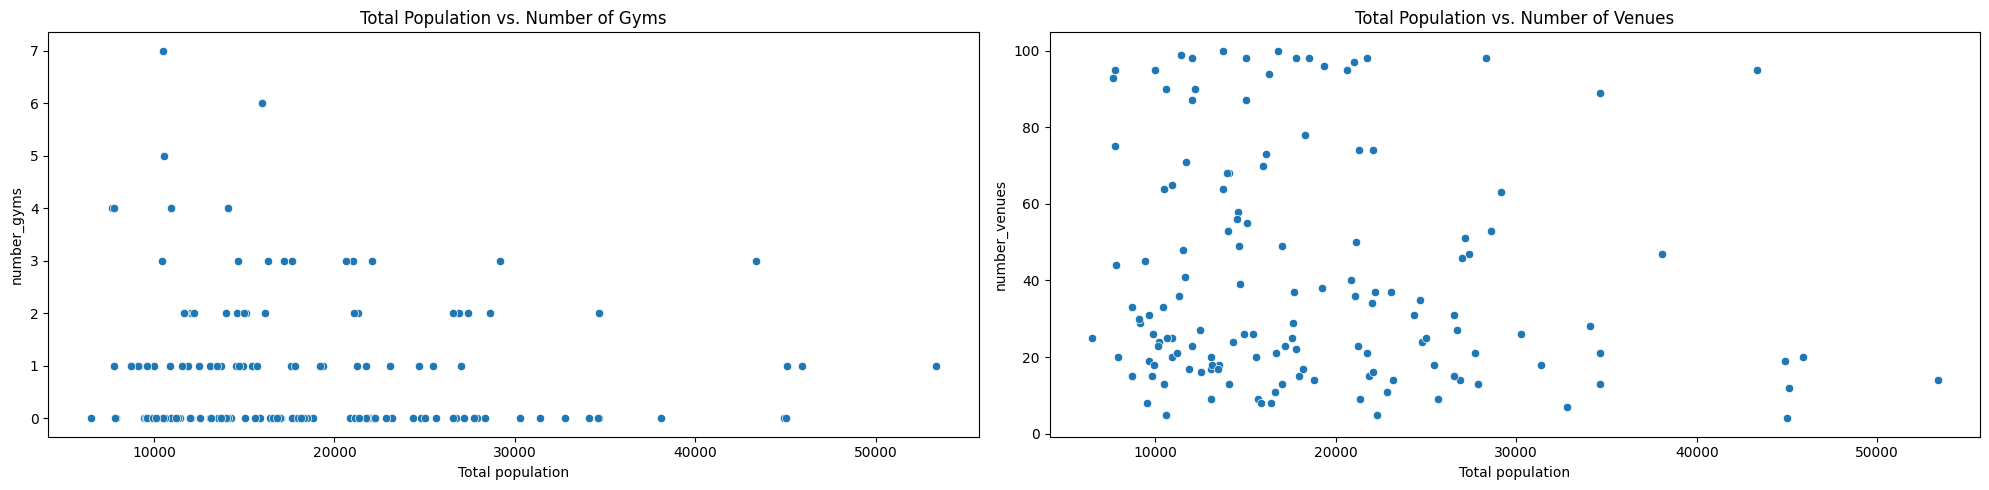

In [38]:
# Create subplots with specified figure size and shared x-axis
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex=True, sharey=False)

# Scatter plot for Total Population vs Number of Gyms
sns.scatterplot(ax=axs[0], data=demographics_data, x='Total population', y='number_gyms')
axs[0].set_title('Total Population vs. Number of Gyms')

# Scatter plot for Total Population vs Number of Venues
sns.scatterplot(ax=axs[1], data=demographics_data, x='Total population', y='number_venues')
axs[1].set_title('Total Population vs. Number of Venues')

# Display the plots
plt.tight_layout()
plt.show()

distrubition of the number of gyms with the rest of the features

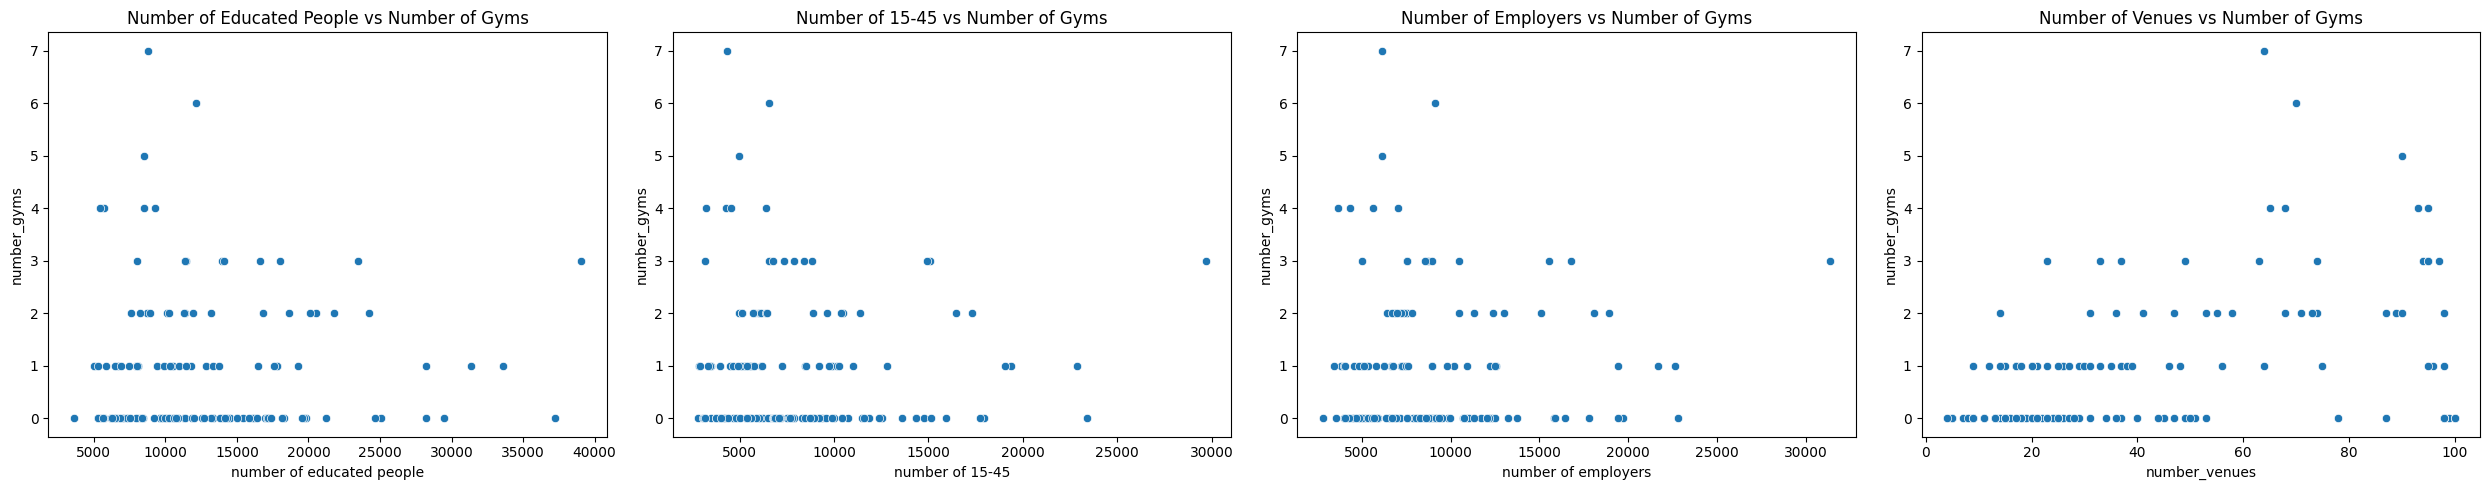

In [40]:
# Create subplots with specified figure size
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

# Scatter plot for Number of Educated People vs Number of Gyms
sns.scatterplot(ax=axs[0], data=demographics_data, x='number of educated people', y='number_gyms')
axs[0].set_title('Number of Educated People vs Number of Gyms')

# Scatter plot for Number of 15-45 vs Number of Gyms
sns.scatterplot(ax=axs[1], data=demographics_data, x='number of 15-45', y='number_gyms')
axs[1].set_title('Number of 15-45 vs Number of Gyms')

# Scatter plot for Number of Employers vs Number of Gyms
sns.scatterplot(ax=axs[2], data=demographics_data, x='number of employers', y='number_gyms')
axs[2].set_title('Number of Employers vs Number of Gyms')

# Scatter plot for Number of Venues vs Number of Gyms
sns.scatterplot(ax=axs[3], data=demographics_data, x='number_venues', y='number_gyms')
axs[3].set_title('Number of Venues vs Number of Gyms')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Clustering

In [41]:
# Preparing the data for clustering by dropping unnecessary columns
neighbourhood_data_clustering = demographics_data.drop(columns=['Neighborhood', 'long_latt'])

# Display the first few rows of the resulting DataFrame
neighbourhood_data_clustering.head()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues
0,30280,19805,11850,13230,0.0,26.0
1,21990,14535,8840,9860,0.0,34.0
2,11900,7915,4520,6240,1.0,17.0
3,29180,23495,15095,16770,3.0,63.0
4,26910,20555,9615,13030,2.0,14.0


In [42]:
# Min-Max Normalization
neighbourhood_data_normalized = (neighbourhood_data_clustering - neighbourhood_data_clustering.min()) / (neighbourhood_data_clustering.max() - neighbourhood_data_clustering.min())

# Display the first few rows of the normalized DataFrame
neighbourhood_data_normalized.head()


,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues
0,0.507682,0.456966,0.33637,0.365227,0.000000,0.229167
1,0.330773,0.308494,0.224433,0.247333,0.000000,0.312500
2,0.11545,0.121989,0.063778,0.120693,0.142857,0.135417
3,0.484208,0.560924,0.457047,0.489068,0.428571,0.614583
4,0.435766,0.478096,0.253254,0.35823,0.285714,0.104167


#### choosing the clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

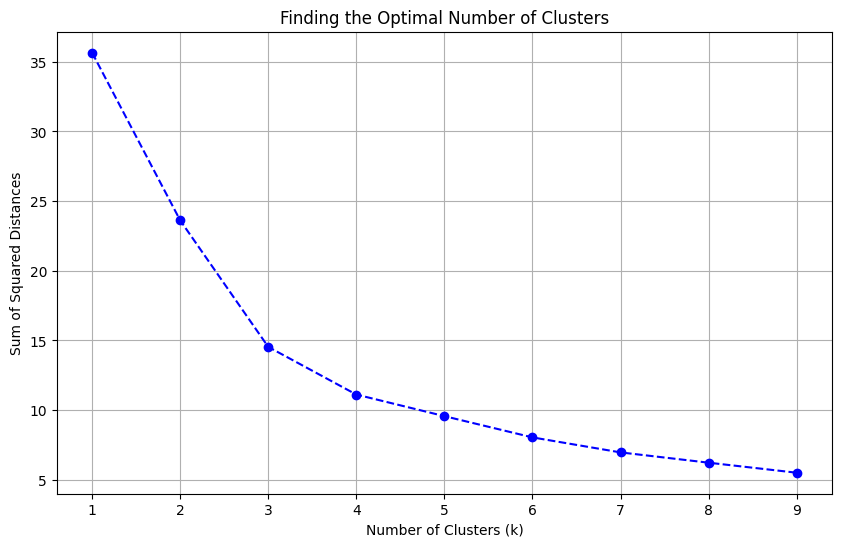

In [44]:
from sklearn.cluster import KMeans

# List to store the scores
scores = []

# Range of k values to try
K = np.arange(1, 10)

# Loop over the range of k values
for k in K:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    model = kmeans_k.fit(neighbourhood_data_normalized)
    score = -model.score(neighbourhood_data_normalized)  # Note the negation
    scores.append(score)

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(K, scores, linestyle='--', marker='o', color='b')
plt.title('Finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                     Neighborhood  Total population  \
0                 Agincourt North             30280   
1    Agincourt South-Malvern West             21990   
2                       Alderwood             11900   
3                           Annex             29180   
4               Banbury-Don Mills             26910   
..                            ...               ...   
135                      Wychwood             13985   
136                Yonge-Eglinton             10580   
137                Yonge-St.Clair             11655   
138       York University Heights             27715   
139            Yorkdale-Glen Park             14685   

     number of educated people  number of 15-45  number of employers  \
0                        19805            11850                13230   
1                        14535             8840                 9860   
2                         7915             4520                 6240   
3                        23495            15095    

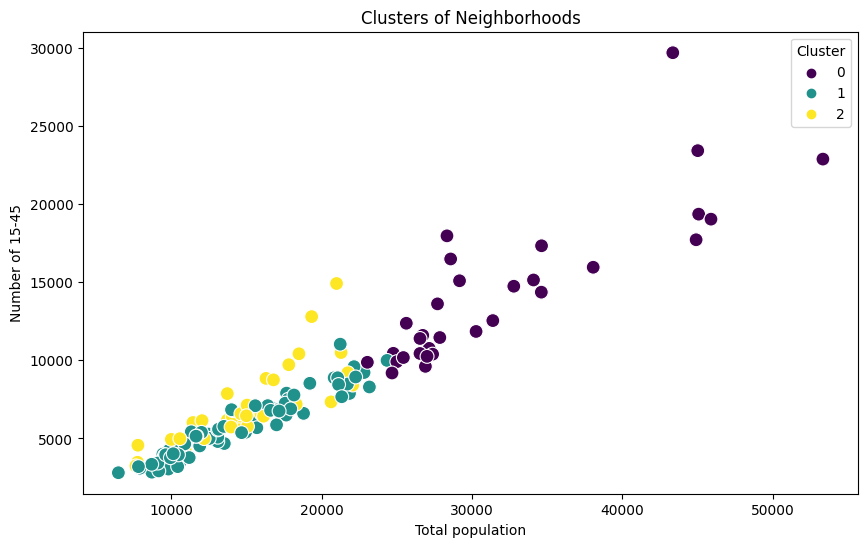

In [47]:
# Define the number of clusters
kclusters = 3

# Initialize and fit the KMeans model
kmeans_model = KMeans(n_clusters=kclusters, random_state=42)
kmeans_model.fit(neighbourhood_data_normalized)

# Predict cluster labels
cluster_labels = kmeans_model.labels_

# Add cluster labels to the original DataFrame
demographics_data['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(demographics_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demographics_data, x='Total population', y='number of 15-45', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Neighborhoods')
plt.xlabel('Total population')
plt.ylabel('Number of 15-45')
plt.legend(title='Cluster')
plt.show()

In [55]:
demographics_data['Labels']=kmeans_model.labels_
neighbourhood_data_clustering['Labels']=kmeans_model.labels_
neighbourhood_data_clustering.head()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
0,30280,19805,11850,13230,0.0,26.0,0
1,21990,14535,8840,9860,0.0,34.0,1
2,11900,7915,4520,6240,1.0,17.0,1
3,29180,23495,15095,16770,3.0,63.0,0
4,26910,20555,9615,13030,2.0,14.0,0


In [58]:

import matplotlib.colors as colors
import matplotlib.cm as cm
# Create a map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
for lat_lon, poi, cluster in zip(demographics_data['long_latt'], demographics_data['Neighborhood'], demographics_data['Labels']):
    lat = lat_lon[0]
    lon = lat_lon[1]
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7
    ).add_to(map_clusters)

map_clusters

In [57]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat_lon, poi, cluster in zip(demographics_data['long_latt'], demographics_data['Neighborhood'], demographics_data['Labels']):
    lat=lat_lon[1]
    lon=lat_lon[0]
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

Properteries of the clusters

In [59]:
label_0=neighbourhood_data_clustering[neighbourhood_data_clustering['Labels']==0]
label_1=neighbourhood_data_clustering[neighbourhood_data_clustering['Labels']==1]
label_2=neighbourhood_data_clustering[neighbourhood_data_clustering['Labels']==2]

In [60]:
label_0.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
count,32.0,32.0,32.0,32.0,32.000000,32.000000,32.0
mean,32087.8125,22243.75,14359.84375,15533.4375,0.718750,32.500000,0.0
std,7871.288469,6285.926293,4752.27458,4687.782927,0.958304,24.850521,0.0
min,23050.0,15020.0,9190.0,10745.0,0.000000,4.000000,0.0
25%,26688.75,17748.75,10447.5,12163.75,0.000000,14.750000,0.0
50%,28467.5,19752.5,13080.0,13480.0,0.000000,24.500000,0.0
75%,34638.75,24731.25,16701.25,18291.25,1.000000,46.250000,0.0
max,53350.0,39080.0,29695.0,31375.0,3.000000,98.000000,0.0


In [63]:
def plot_histograms(data_used):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    sns.histplot(ax=axs[0,0],data=data_used,x='Total population')
    axs[0,0].set_title('Total population')
    sns.histplot(ax=axs[0,1],data=data_used,x='number of 15-45')
    axs[0,1].set_title('number of 15-45')
    sns.histplot(ax=axs[0,2],data=data_used,x='number of educated people')
    axs[0,2].set_title('number of educated people ')

    sns.histplot(ax=axs[1,0],data=data_used,x='number of employers')
    axs[1,0].set_title('number of employers')

    sns.histplot(ax=axs[1,1],data=data_used,x='number_gyms')
    axs[1,1].set_title('number_gyms')
    sns.histplot(ax=axs[1,2],data=data_used,x='number_venues')
    axs[1,2].set_title('number_venues ')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

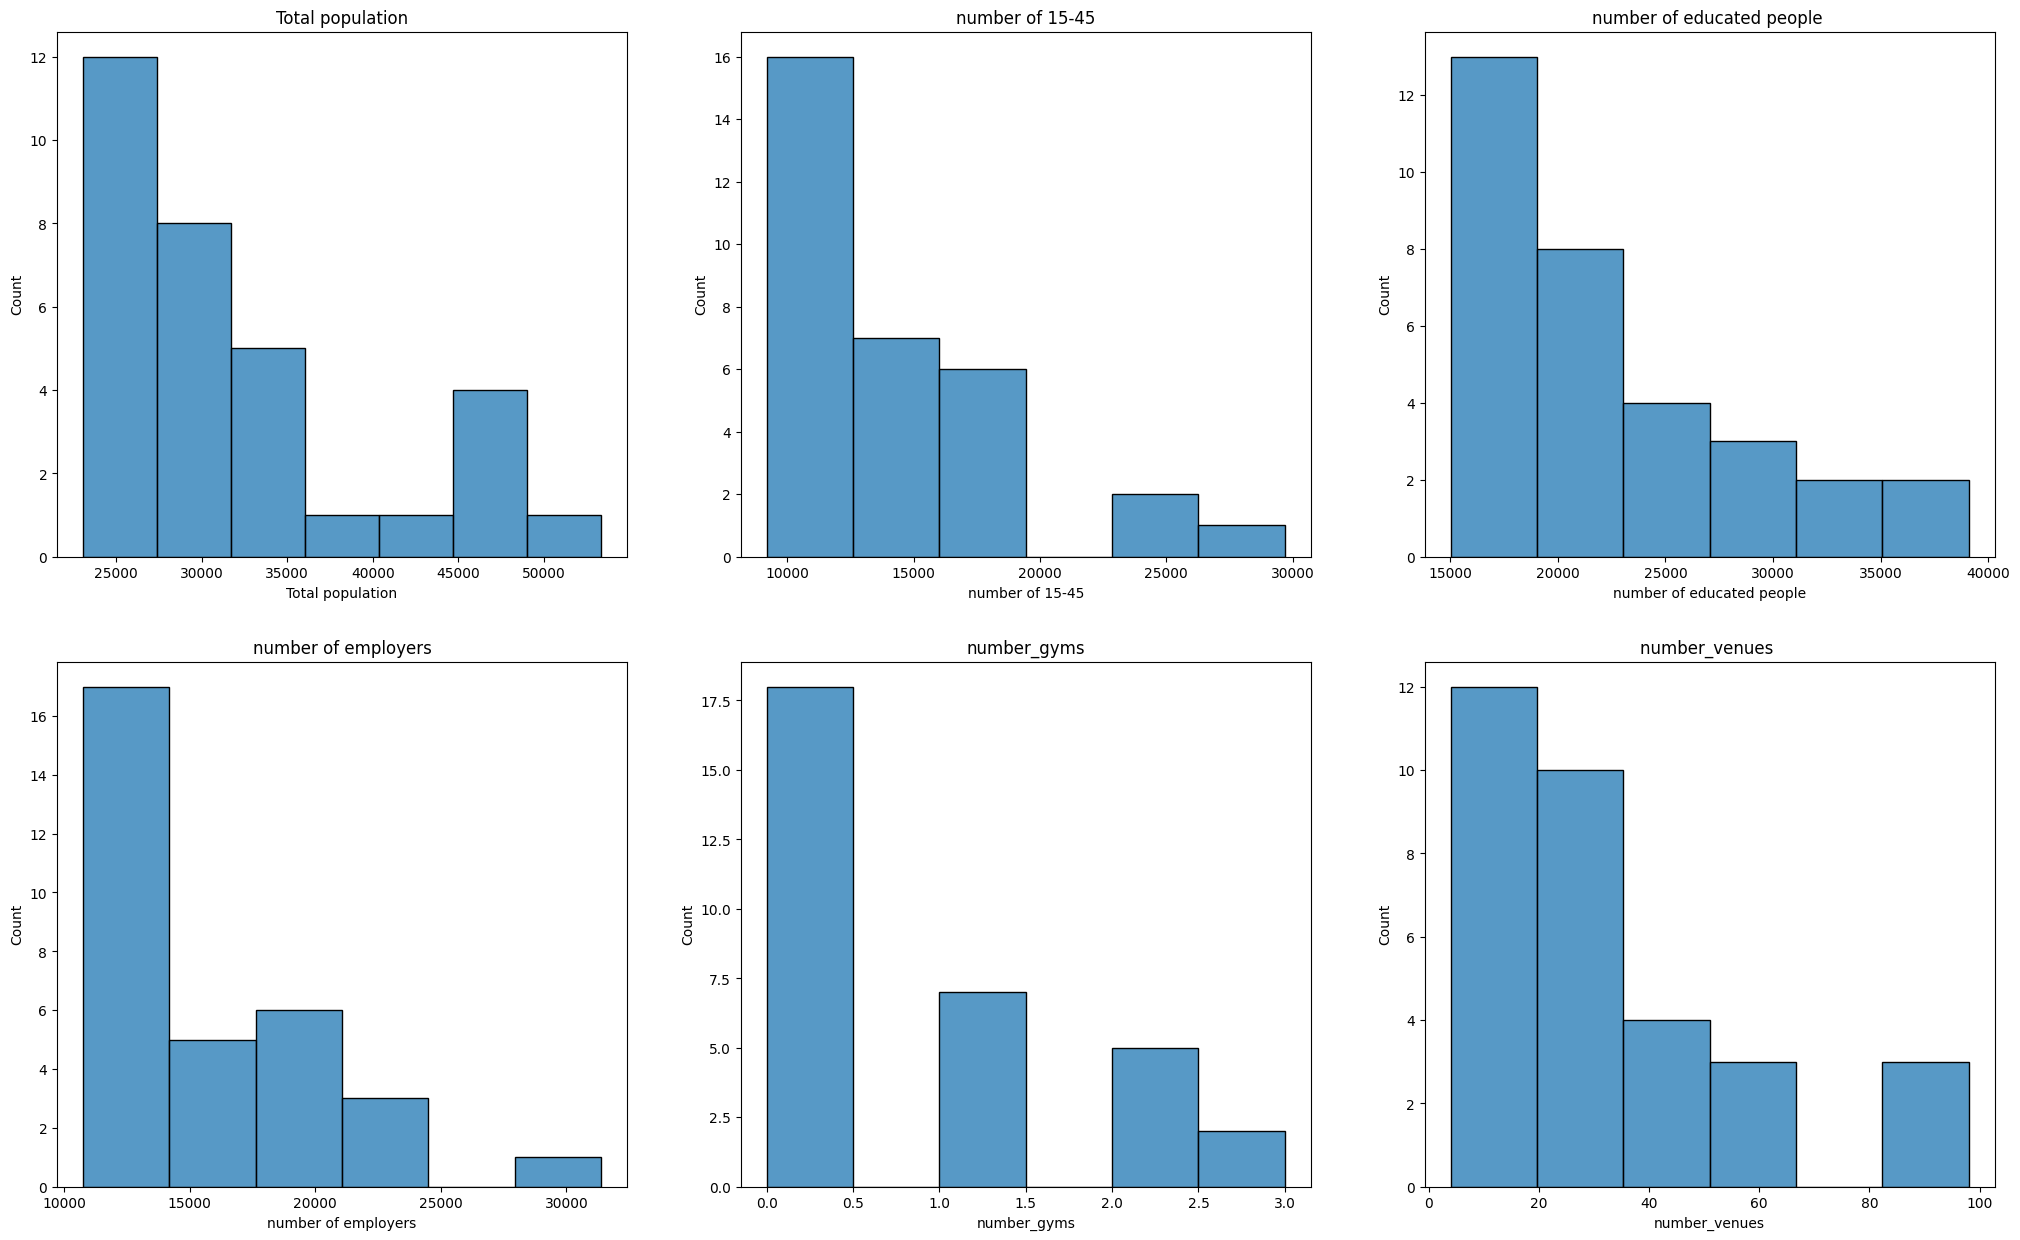

In [64]:
plot_histograms(label_0)

In [65]:
label_1.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
count,73.0,73.0,73.0,73.0,73.000000,73.000000,73.0
mean,14696.643836,9671.506849,5925.068493,6810.068493,0.438356,23.780822,1.0
std,4678.128933,3183.843729,2049.055591,2134.235404,0.745101,11.525632,0.0
min,6490.0,3585.0,2805.0,2790.0,0.000000,5.000000,1.0
25%,10580.0,6830.0,4020.0,5000.0,0.000000,15.000000,1.0
50%,14015.0,9790.0,5590.0,6695.0,0.000000,22.000000,1.0
75%,17785.0,11875.0,7255.0,8280.0,1.000000,31.000000,1.0
max,24360.0,16330.0,11035.0,12155.0,3.000000,53.000000,1.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

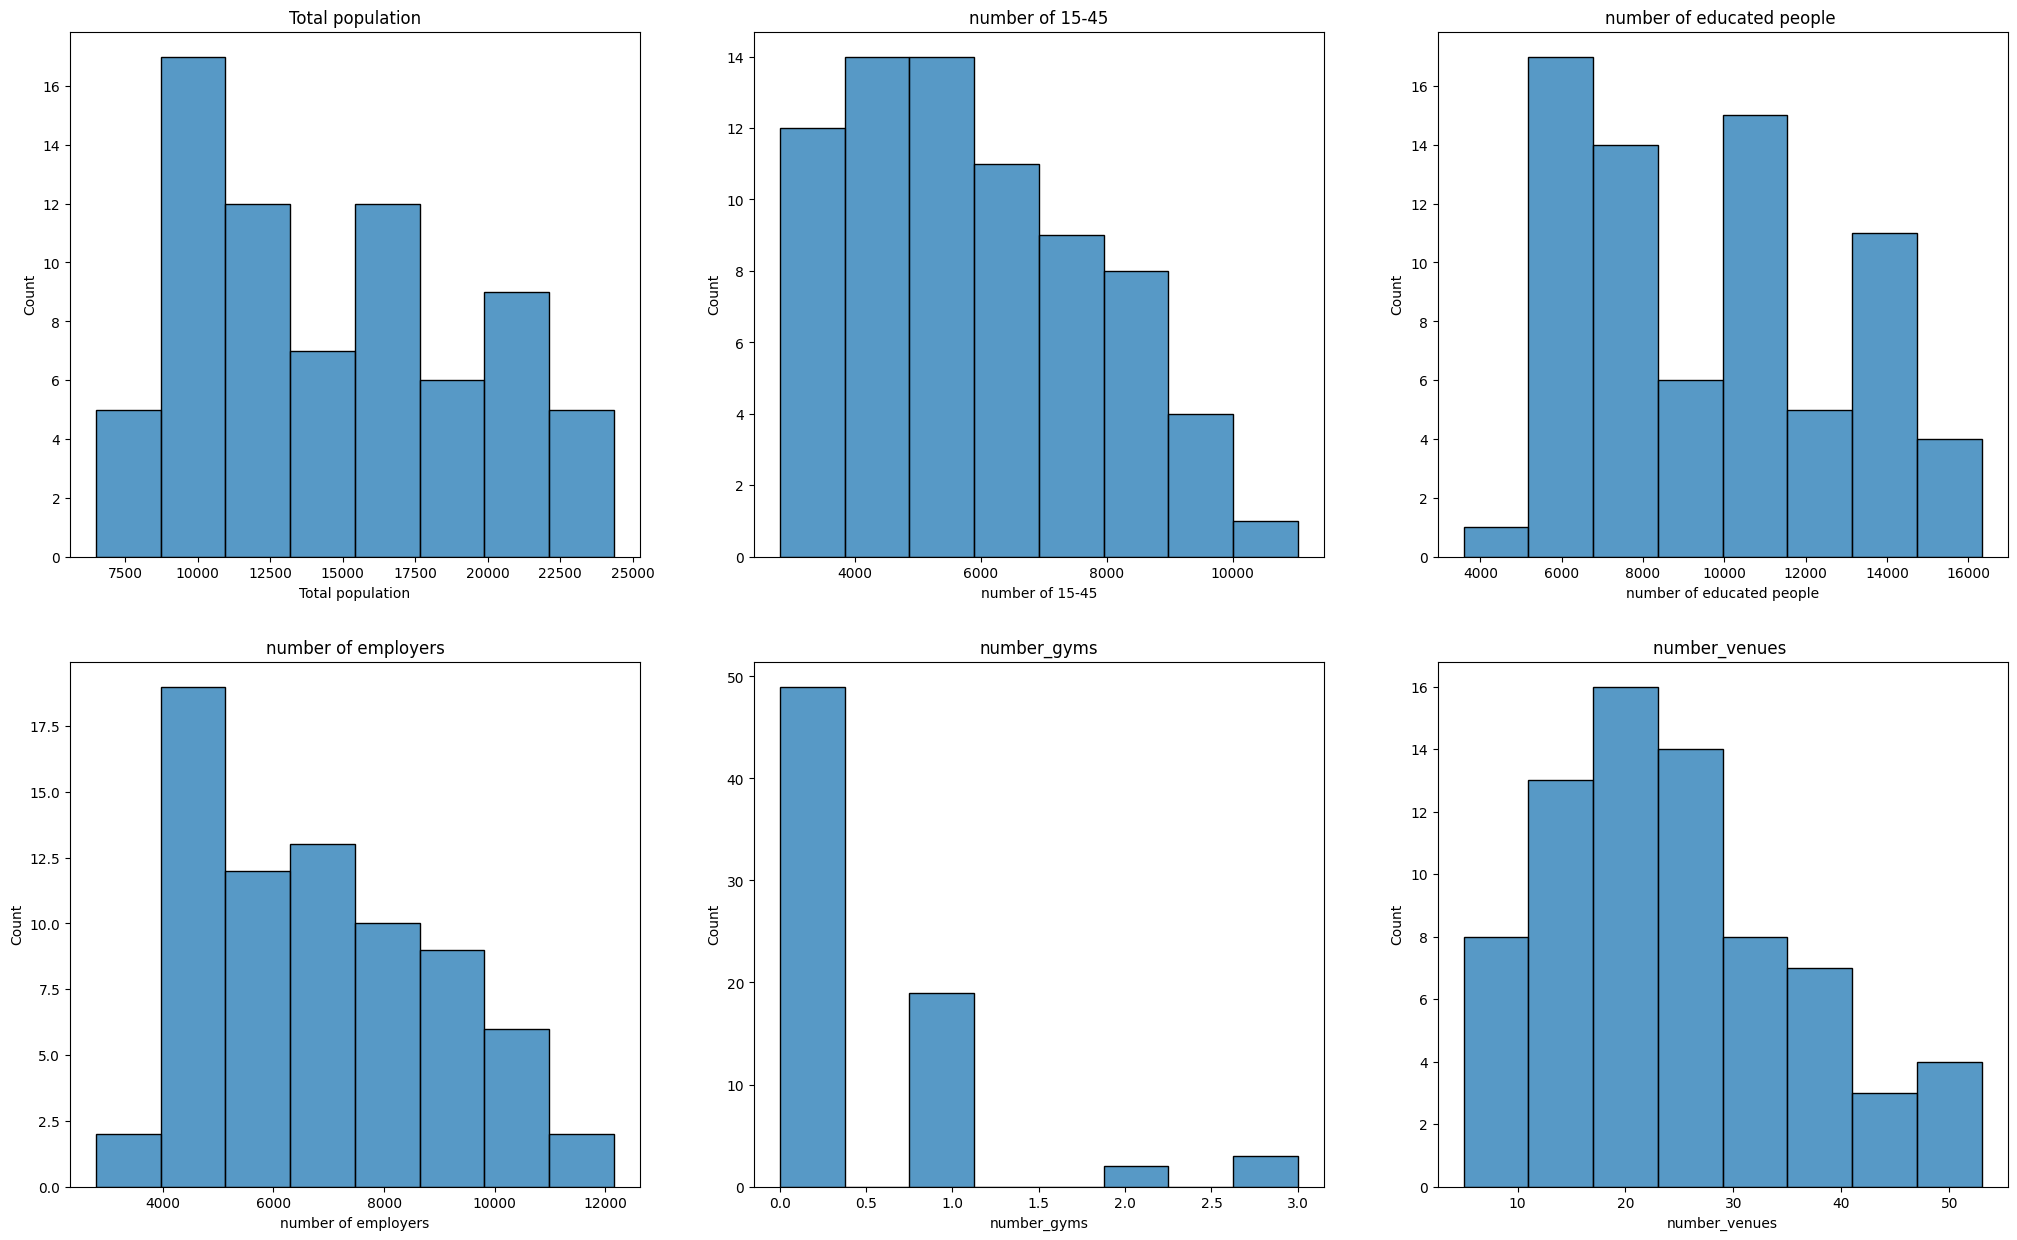

In [66]:
plot_histograms(label_1)

In [67]:
label_2.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
count,35.0,35.0,35.0,35.0,35.000000,35.000000,35.0
mean,14717.285714,10695.857143,6921.142857,7791.571429,2.085714,82.000000,2.0
std,4028.120337,3383.702394,2527.695732,2461.997566,1.788385,15.835552,0.0
min,7655.0,4980.0,3240.0,3450.0,0.000000,49.000000,2.0
25%,11877.5,8505.0,5242.5,6675.0,1.000000,69.000000,2.0
50%,14610.0,10345.0,6380.0,7515.0,2.000000,87.000000,2.0
75%,17315.0,12092.5,8145.0,8950.0,3.000000,96.500000,2.0
max,22080.0,18010.0,14920.0,15535.0,7.000000,100.000000,2.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

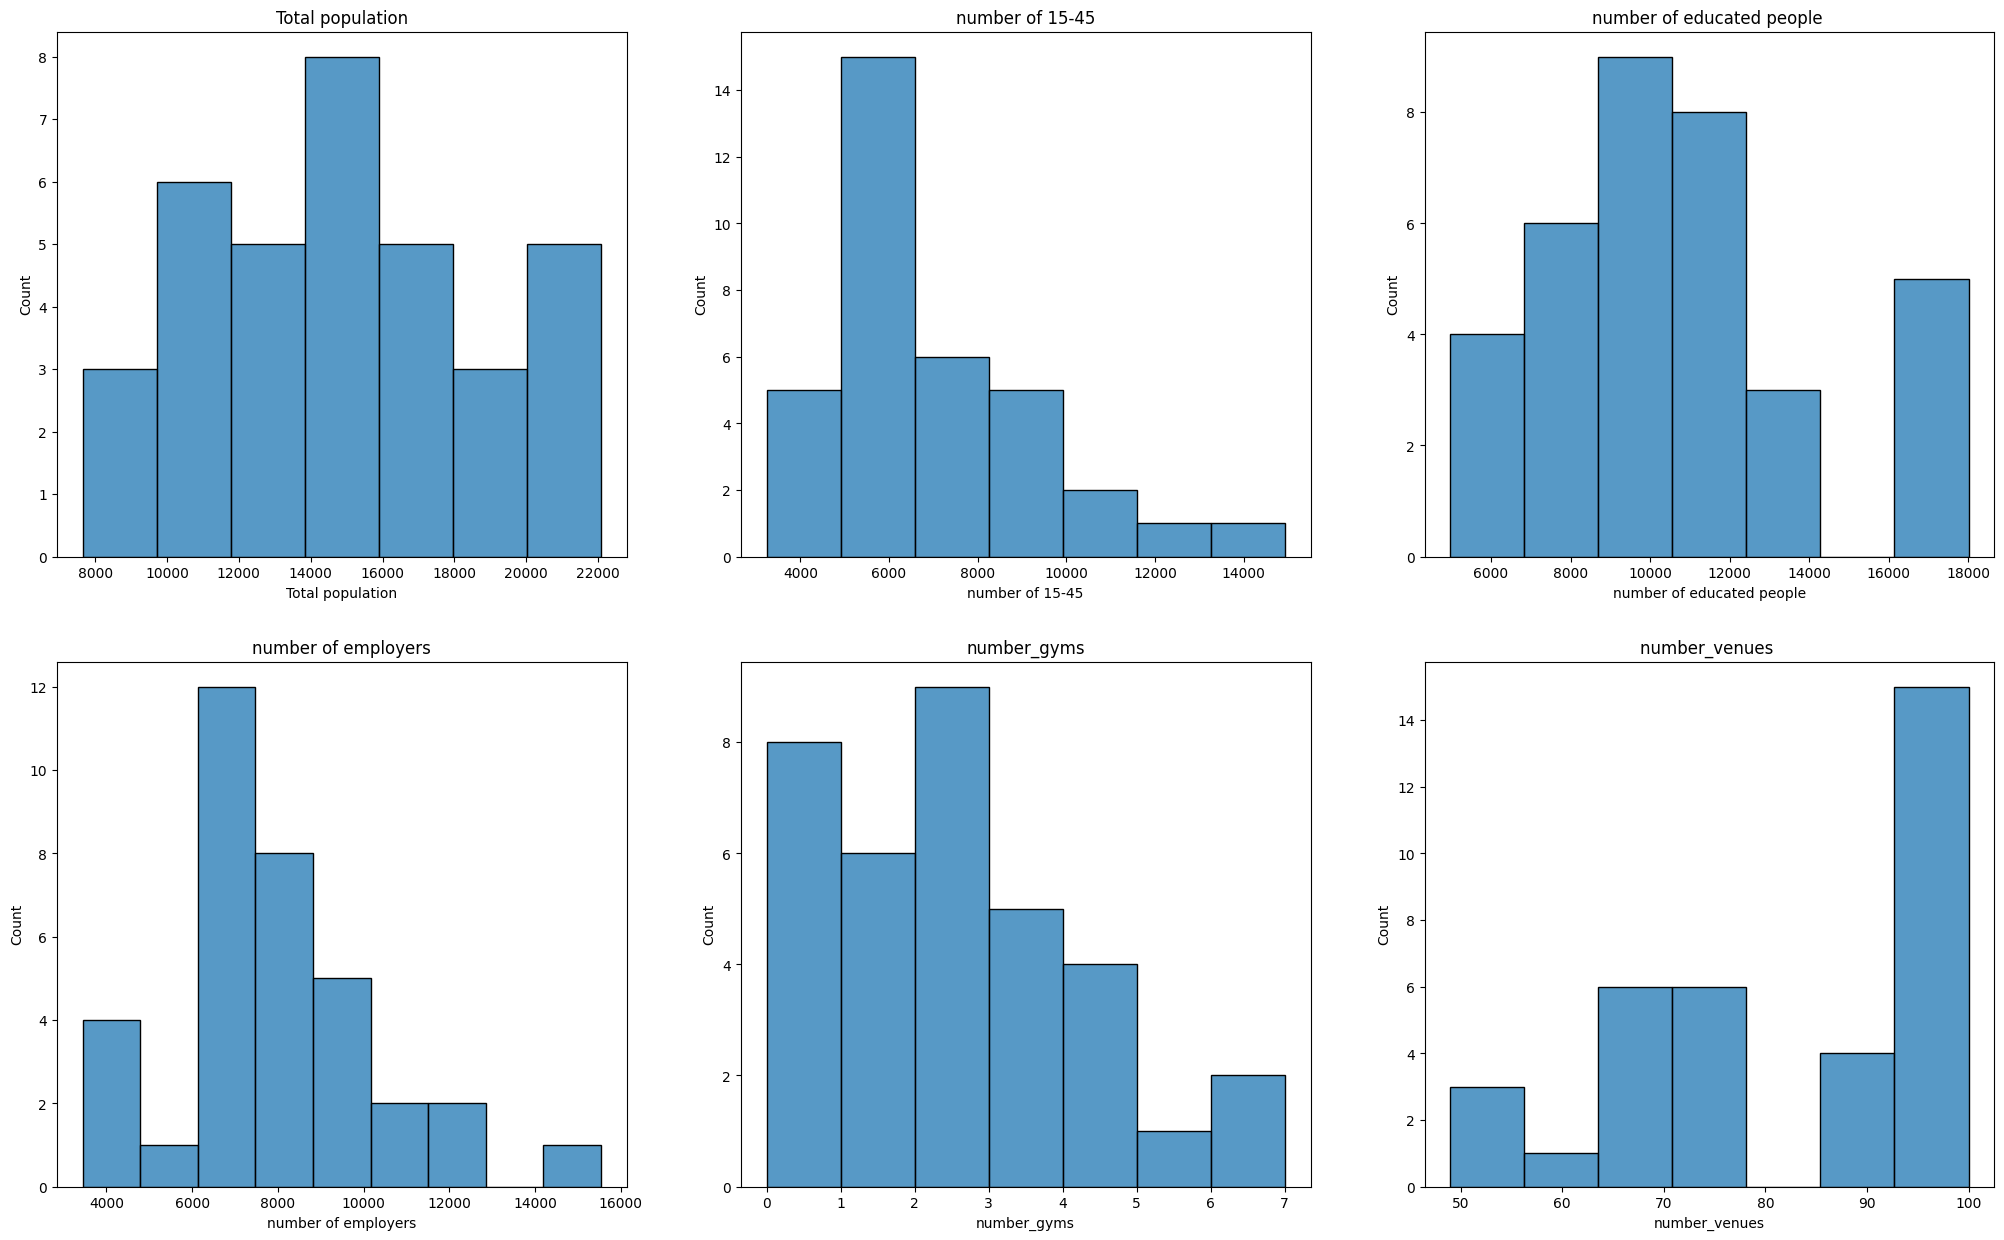

In [68]:
plot_histograms(label_2)

In [71]:
neighborhoods_0=demographics_data[demographics_data['Labels']==0]
neighborhoods_1=demographics_data[demographics_data['Labels']==1]
neighborhoods_2=demographics_data[demographics_data['Labels']==2]

#### finding the best neighborhoods in the third cluster

In [72]:
neighborhoods_2[neighborhoods_2['number_gyms']==0].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Cluster,Labels
94,Palmerston-Little Italy,13735,10515,7870,8555,"[-79.4179822658754, 43.6552544722333]",0.0,100.0,2,2
119,Trinity-Bellwoods,16805,10605,8750,9155,"[-79.4067961746276, 43.6542865396434]",0.0,100.0,2,2
34,Dufferin Grove,11450,8005,6020,6650,"[-79.4316412650605, 43.6527430564478]",0.0,99.0,2,2
50,High Park-Swansea,21750,16420,9205,12060,"[-79.4521493275074, 43.6551927866022]",0.0,98.0,2,2
62,Kensington-Chinatown,18500,13210,10420,9495,"[-79.3889278224463, 43.6563478260557]",0.0,98.0,2,2
103,Roncesvalles,15050,10170,7135,8255,"[-79.4521493275074, 43.6551927866022]",0.0,98.0,2,2
19,Cabbagetown-South St. James Town,12050,9595,5335,7155,"[-79.3713421467449, 43.6718887916088]",0.0,87.0,2,2
92,O'Connor-Parkview,18315,12015,7195,8480,"[-79.4298991024178, 43.6838873093489]",0.0,78.0,2,2


In [73]:
neighborhoods_2[neighborhoods_2['number_gyms']==1].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Cluster,Labels
89,North St. James Town,17825,13355,9720,8935,"[-79.376270792038, 43.6664293113267]",1.0,98.0,2,2
6,Bay Street Corridor,19345,16495,12800,10220,"[-79.3912583210563, 43.6606532521722]",1.0,96.0,2,2
100,Regent Park,10010,5820,4940,3450,"[-79.3564502940338, 43.6644904578707]",1.0,95.0,2,2
14,Blake-Jones,7765,4980,3475,3805,"[-79.3354787855352, 43.6725854142185]",1.0,75.0,2,2
27,Corso Italia-Davenport,13735,8005,6170,6700,"[-79.4521351447371, 43.6720006802834]",1.0,64.0,2,2
68,Lawrence Park North,14540,10345,5550,7515,"[-79.4049913405976, 43.7359806040823]",1.0,56.0,2,2


#### finding the best neigborhoods in the first cluster

In [74]:
neighborhoods_0[neighborhoods_0['number_gyms']==0].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Cluster,Labels
23,Church-Yonge Corridor,28345,25065,17970,17795,"[-79.3830705117445, 43.6613720049663]",0.0,98.0,0,0
76,Milliken,27160,17170,10765,12115,"[-79.2885873540872, 43.8067440626433]",0.0,51.0,0,0
58,Islington-City Centre West,38070,28235,15960,19735,"[-79.541660068977, 43.6150511840077]",0.0,47.0,0,0
124,West Humber-Clairville,34100,21195,15145,15865,"[-79.5558065968119, 43.7073093326377]",0.0,28.0,0,0
30,Don Valley Village,26735,19700,11600,12325,"[-79.3662204557787, 43.790141293136706]",0.0,27.0,0,0
0,Agincourt North,30280,19805,11850,13230,"[-79.2816161258827, 43.797405754163]",0.0,26.0,0,0
112,Steeles,25010,17135,9915,10745,"[-79.3089876934767, 43.8082759877451]",0.0,25.0,0,0
24,Clairlea-Birchmount,24775,16145,10450,11720,"[-79.2698075136083, 43.7016197049505]",0.0,24.0,0,0
95,Parkwoods-Donalda,34620,24620,14365,16420,"[-79.3361123102507, 43.7415562256228]",0.0,21.0,0,0
138,York University Heights,27715,17375,13615,12030,"[-79.5080896369474, 43.7627147512454]",0.0,21.0,0,0


In [75]:
neighborhoods_0[neighborhoods_0['number_gyms']==1].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Cluster,Labels
128,Wexford/Maryvale,27020,17625,10255,12515,"[-79.3195548771288, 43.7679300520975]",1.0,46.0,0,0
86,Newtonbrook West,23050,17790,9875,10900,"[-79.4270213613855, 43.7772079217892]",1.0,37.0,0,0
113,Stonegate-Queensway,24690,17820,9190,12550,"[-79.48496738444501, 43.6412304354618]",1.0,35.0,0,0
105,Rouge,45905,31355,19040,22630,"[-79.200181515255, 43.8036974725661]",1.0,20.0,0,0
125,Westminster-Branson,25445,19235,10180,12245,"[-79.4470012598403, 43.7670517885172]",1.0,18.0,0,0
132,Woburn,53350,33590,22885,21665,"[-79.2183581838386, 43.7490457922858]",1.0,14.0,0,0
73,Malvern,45085,28240,19360,19425,"[-79.2259603274949, 43.7889846980208]",1.0,12.0,0,0
